In [1]:
# -*- coding: utf-8 -*-
import json
import numpy as np
import pandas as pd
import time, datetime
BUY = 0
SELL = 1

In [2]:
from threading import Thread,Lock
import thread
import time
import pymysql
result = list()
lock = Lock()
#总数据量等于 线程数*各线程任务数
threadNum = 50#启多少个线程
threadTaskNum = 200#每个线程下载多少条数据

# 为线程定义一个函数
def print_time( threadName, index):
    global result
    global lock
    global threadNum
    global threadTaskNum
    ## 加上字符集参数，防止中文乱码
    dbconn=pymysql.connect(
      host="127.0.0.1",
      database="huobipro",
      user="root",
      password="123456",
      port=3306,
      charset='utf8'
    )  
    for i in range(threadTaskNum):
        #sql语句
        cursor = dbconn.cursor()
        sqlcmd="select value from market_htusdt_trade_detail where id=%d"%(index*threadNum+i+1)
        cursor.execute(sqlcmd)
        # 获取剩余结果的第一行数据
        row_1 = cursor.fetchone()
        lock.acquire()
        #print("线程名：%s，index=%d，SQL命令：%s, i=%d"%(threadName,index,sqlcmd,i))
        #print row_1[0]
        result.append(row_1[0])            
        lock.release() 
        
    dbconn.close()

 
# 创建duo个线程
for i in range(threadNum):
    try:
       thread.start_new_thread( print_time, ("Thread-%d"%i, i, ) )
    except:
       print "Error: unable to start thread"

resultLen = 0
while(resultLen!=threadNum*threadTaskNum):
    time.sleep(5)
    lock.acquire()
    resultLen = len(result)
    print ('现在一共有%d条数据'%resultLen)
    lock.release()
print ('resultLen',resultLen)
print ("main end")

现在一共有733条数据
现在一共有1827条数据
现在一共有2903条数据
现在一共有3950条数据
现在一共有4902条数据
现在一共有5951条数据
现在一共有7042条数据
现在一共有7931条数据
现在一共有8786条数据
现在一共有9715条数据
现在一共有10000条数据
('resultLen', 10000)
main end


In [37]:
# f = open('./data/market.htusdt.trade.detail','r')#以读方式打开文件  
# result = list()  
# for line in f.readlines():                          #依次读取每行  
#     line = line.strip()                             #去掉每行头尾空白  
#     if not len(line) or line.startswith('#'):       #判断是否是空行或注释行  
#         continue                                    #是的话，跳过不处理  
#     result.append(line)                             #保存
# print result 

In [3]:
print len(result)

10000


In [4]:
allTrade = []
for i in range(len(result)):
    trade = json.loads(result[i])
    for j in range(len(trade['tick']['data'])):  
        oneTrade = []
        d = trade['tick']['data'][j]
        oneTrade.append(str(d['id']))
        oneTrade.append(d['price'])
        oneTrade.append(d['amount'])
        oneTrade.append(d['direction'])
        oneTrade.append(d['ts'])
        allTrade.append(oneTrade)
    



In [5]:

tradeDF = pd.DataFrame(allTrade)
tradeDF.columns = ['id','price','amount','direction','ts']
print tradeDF.head(5)

                     id   price      amount direction             ts
0  76445888804662280000  5.4367  255.490000      sell  1526724068907
1  76442522384662070000  5.3755  506.330000      sell  1526723626431
2  76445626194662260000  5.4151   10.000000       buy  1526724036092
3  76445626194662260000  5.4167  444.898104       buy  1526724036092
4  76445626194662260000  5.4167   93.020000       buy  1526724036092


In [6]:
# 使用time
def millisecondToMinute(s):
    timeStamp = s/1000
    timeArray = time.localtime(timeStamp)
    otherStyleTime = time.strftime("%Y%m%d%H%M", timeArray)
    return int(otherStyleTime)
tradeDF['minute'] = tradeDF['ts'].map(millisecondToMinute)
print tradeDF

                         id   price       amount direction             ts  \
0      76445888804662280000  5.4367   255.490000      sell  1526724068907   
1      76442522384662070000  5.3755   506.330000      sell  1526723626431   
2      76445626194662260000  5.4151    10.000000       buy  1526724036092   
3      76445626194662260000  5.4167   444.898104       buy  1526724036092   
4      76445626194662260000  5.4167    93.020000       buy  1526724036092   
5      76445626194662260000  5.4167     0.100000       buy  1526724036092   
6      76445626194650660000  5.4168    75.000000       buy  1526724036092   
7      76445626194662260000  5.4168     1.000000       buy  1526724036092   
8      76445626194650660000  5.4188    75.000000       buy  1526724036092   
9      76455222414662830000  5.4417    16.520000      sell  1526725223327   
10     76455222414662830000  5.4415   627.410000      sell  1526725223327   
11     76455222414662830000  5.4415    38.260000      sell  1526725223327   

In [7]:

def norepeatNum(group):#不重复的个数
    return len(set(list(group)))

dictMaping = {
    'id':[norepeatNum],
    'price':['max','min','mean','median'],
    'amount':['max','min','mean','median','count']
}
newTradeDF = tradeDF.groupby(['minute','direction']).agg(dictMaping)
print newTradeDF.index#apply(lambda x : 0 if str(x)=='buy' else 1)
print newTradeDF.shape

MultiIndex(levels=[[201805191749, 201805191750, 201805191751, 201805191752, 201805191753, 201805191754, 201805191755, 201805191756, 201805191757, 201805191758, 201805191759, 201805191800, 201805191801, 201805191802, 201805191803, 201805191804, 201805191805, 201805191806, 201805191807, 201805191808, 201805191809, 201805191810, 201805191811, 201805191812, 201805191813, 201805191814, 201805191815, 201805191816, 201805191817, 201805191818, 201805191819, 201805191820, 201805191821, 201805191822, 201805191823, 201805191824, 201805191825, 201805191826, 201805191827, 201805191828, 201805191829, 201805191830, 201805191831, 201805191832, 201805191833, 201805191834, 201805191835, 201805191836, 201805191837, 201805191838, 201805191839, 201805191840, 201805191841, 201805191842, 201805191843, 201805191844, 201805191845, 201805191846, 201805191847, 201805191848, 201805191849, 201805191850, 201805191851, 201805191852, 201805191853, 201805191854, 201805191855, 201805191856, 201805191857], [u'buy', u'se

In [8]:
newTradeDF['direction'] = range(newTradeDF.shape[0])
newTradeDF['direction'] = newTradeDF['direction'].map(lambda x : BUY if newTradeDF.index[x][1]=='buy' else SELL)
newTradeDF['minute']= range(newTradeDF.shape[0])
newTradeDF['minute'] = newTradeDF['minute'].map(lambda x : newTradeDF.index[x][0])
newTradeDF.reset_index(drop=True, inplace=True)
print newTradeDF

           amount                                             price          \
              max         min        mean      median count     max     min   
0     3285.040000    0.120000  391.598182   75.000000    11  5.3666  5.3603   
1      454.240000    6.510000  197.697368  199.980000    19  5.3665  5.3602   
2     2000.000000    0.100000  256.044737   64.150000    19  5.3750  5.3668   
3      372.710000    1.000000  123.978947   79.700000    19  5.3713  5.3666   
4     3188.880000    0.650000  593.953636  259.670000    55  5.3780  5.3729   
5     1860.340000    2.780000  286.545862  243.700000   174  5.3780  5.3713   
6     1911.125786   10.000000  203.672407   43.720000    51  5.3785  5.3751   
7     6009.310000    1.170000  434.825400  243.700000   192  5.3785  5.3754   
8     1607.280000    5.000000  327.282857  107.830000    56  5.3760  5.3650   
9     3349.830000   12.320000  386.420500  116.600000    80  5.3755  5.3694   
10     163.020000    1.000000   69.006667   43.00000

In [9]:
print newTradeDF.columns

MultiIndex(levels=[[u'amount', u'price', u'id', u'direction', u'minute'], [u'count', u'max', u'mean', u'median', u'min', u'norepeatNum', u'']],
           labels=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 3, 4], [1, 4, 2, 3, 0, 1, 4, 2, 3, 5, 6, 6]])


In [10]:
newColumns = []
for i in range(len(newTradeDF.columns)):
    if newTradeDF.columns[i][1]:
        newColumns.append(str(newTradeDF.columns[i][0])+'_'+newTradeDF.columns[i][1])
    else:        
        newColumns.append(str(newTradeDF.columns[i][0]))
newTradeDF.columns = newColumns

In [11]:
print newTradeDF

       amount_max  amount_min  amount_mean  amount_median  amount_count  \
0     3285.040000    0.120000   391.598182      75.000000            11   
1      454.240000    6.510000   197.697368     199.980000            19   
2     2000.000000    0.100000   256.044737      64.150000            19   
3      372.710000    1.000000   123.978947      79.700000            19   
4     3188.880000    0.650000   593.953636     259.670000            55   
5     1860.340000    2.780000   286.545862     243.700000           174   
6     1911.125786   10.000000   203.672407      43.720000            51   
7     6009.310000    1.170000   434.825400     243.700000           192   
8     1607.280000    5.000000   327.282857     107.830000            56   
9     3349.830000   12.320000   386.420500     116.600000            80   
10     163.020000    1.000000    69.006667      43.000000            12   
11    3250.310000    1.000000   990.004167     721.850000            48   
12    2466.180000    1.00

In [12]:
buyDF = newTradeDF[newTradeDF['direction']==BUY]
sellDF = newTradeDF[newTradeDF['direction']==SELL]
buyDF = buyDF.drop(['direction'], axis=1)
sellDF = sellDF.drop(['direction'], axis=1)

buyDF.columns = [ 'buy_'+columnName for columnName in buyDF.columns]
sellDF.columns = [ 'sell_'+columnName for columnName in sellDF.columns]
buySellDF = buyDF.merge(sellDF, left_on='buy_minute', right_on='sell_minute')
buySellDF = buySellDF.drop(['buy_minute'], axis=1)
print buySellDF.columns




Index([u'buy_amount_max', u'buy_amount_min', u'buy_amount_mean',
       u'buy_amount_median', u'buy_amount_count', u'buy_price_max',
       u'buy_price_min', u'buy_price_mean', u'buy_price_median',
       u'buy_id_norepeatNum', u'sell_amount_max', u'sell_amount_min',
       u'sell_amount_mean', u'sell_amount_median', u'sell_amount_count',
       u'sell_price_max', u'sell_price_min', u'sell_price_mean',
       u'sell_price_median', u'sell_id_norepeatNum', u'sell_minute'],
      dtype='object')


In [13]:
buySellDF.rename(columns={'sell_minute':'minute'}, inplace=True)
buySellDF.set_index(buySellDF['minute'], inplace=True, drop=True)
#buySellDF = buySellDF.drop(['minute'], axis=1)
print buySellDF.columns
print buySellDF.index

Index([u'buy_amount_max', u'buy_amount_min', u'buy_amount_mean',
       u'buy_amount_median', u'buy_amount_count', u'buy_price_max',
       u'buy_price_min', u'buy_price_mean', u'buy_price_median',
       u'buy_id_norepeatNum', u'sell_amount_max', u'sell_amount_min',
       u'sell_amount_mean', u'sell_amount_median', u'sell_amount_count',
       u'sell_price_max', u'sell_price_min', u'sell_price_mean',
       u'sell_price_median', u'sell_id_norepeatNum', u'minute'],
      dtype='object')
Int64Index([201805191749, 201805191750, 201805191751, 201805191752,
            201805191753, 201805191754, 201805191755, 201805191756,
            201805191757, 201805191758, 201805191759, 201805191800,
            201805191801, 201805191802, 201805191803, 201805191804,
            201805191805, 201805191806, 201805191807, 201805191808,
            201805191809, 201805191810, 201805191811, 201805191812,
            201805191813, 201805191814, 201805191815, 201805191816,
            201805191817, 20180

In [14]:
print buySellDF

              buy_amount_max  buy_amount_min  buy_amount_mean  \
minute                                                          
201805191749     3285.040000        0.120000       391.598182   
201805191750     2000.000000        0.100000       256.044737   
201805191751     3188.880000        0.650000       593.953636   
201805191752     1911.125786       10.000000       203.672407   
201805191753     1607.280000        5.000000       327.282857   
201805191754      163.020000        1.000000        69.006667   
201805191755     2466.180000        1.000000       200.806190   
201805191756      315.022320        0.910000        98.432018   
201805191757      910.430000        5.000000       221.072502   
201805191758     3189.840000       16.610000       397.992618   
201805191759     2977.960000        5.000000       578.784308   
201805191800    50000.000000        0.000701       900.312110   
201805191801     5000.000000        0.170000       344.247841   
201805191802     1240.530

In [18]:
myTestBuySellDF = buySellDF.reset_index(drop=True)
dataNeedNum = 30#需要多少数据量
if len(myTestBuySellDF)<dataNeedNum:
    print("数据量比较少，请添加数据量")
myTestX =  range(dataNeedNum)

            3            2
-3.817e-05 x + 0.001402 x - 0.008015 x + 5.377
            2
-0.0001145 x + 0.002803 x - 0.008015


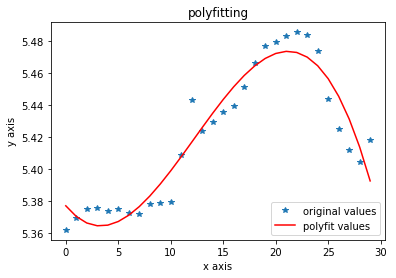

            3             2
-1.094e-05 x + 0.0001612 x + 0.006416 x + 5.357
            2
-3.283e-05 x + 0.0003224 x + 0.006416


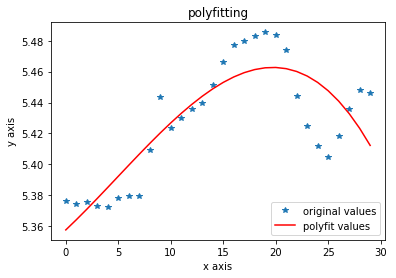

           3            2
1.528e-05 x - 0.001005 x + 0.01911 x + 5.346
           2
4.584e-05 x - 0.00201 x + 0.01911


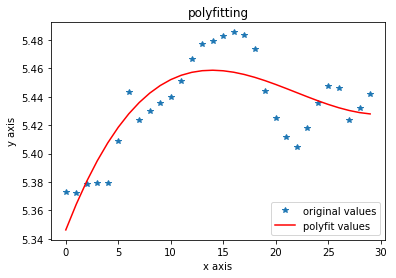

           3            2
3.372e-05 x - 0.001666 x + 0.02324 x + 5.367
           2
0.0001012 x - 0.003333 x + 0.02324


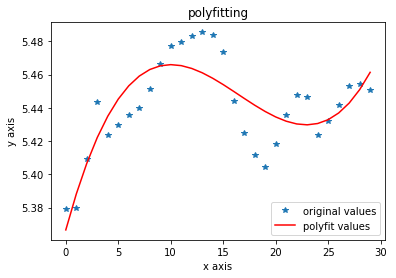

           3            2
2.365e-05 x - 0.001048 x + 0.01198 x + 5.423
           2
7.095e-05 x - 0.002095 x + 0.01198


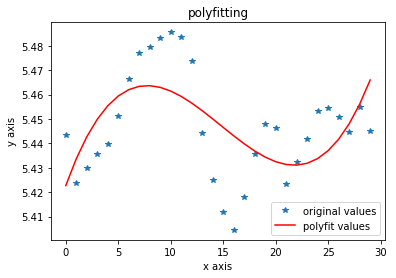

           3             2
7.303e-06 x - 0.0002888 x + 0.001854 x + 5.456
           2
2.191e-05 x - 0.0005776 x + 0.001854


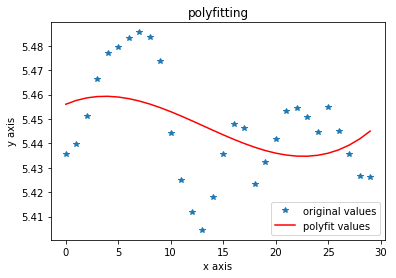

            3             2
-1.479e-05 x + 0.0007447 x - 0.01165 x + 5.495
            2
-4.436e-05 x + 0.001489 x - 0.01165


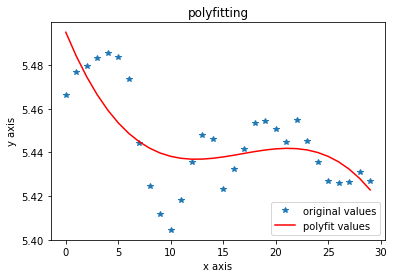

            3             2
-2.115e-05 x + 0.0009903 x - 0.01359 x + 5.489
            2
-6.346e-05 x + 0.001981 x - 0.01359


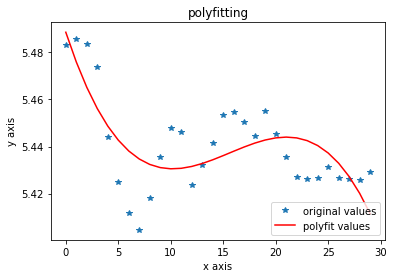

            3             2
-4.546e-06 x + 0.0001521 x - 0.00125 x + 5.438
            2
-1.364e-05 x + 0.0003042 x - 0.00125


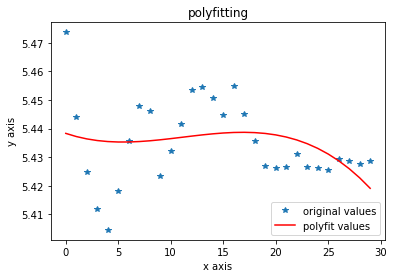

           3             2
1.512e-05 x - 0.0007463 x + 0.009999 x + 5.406
           2
4.537e-05 x - 0.001493 x + 0.009999


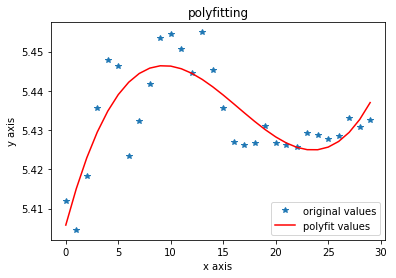

In [25]:
import matplotlib.pyplot as plt
import numpy as np

x = myTestX

for i in range(10):
    startIndex = i*3
    y = list(myTestBuySellDF['sell_price_mean'][startIndex:startIndex+dataNeedNum])
    z1 = np.polyfit(x, y, 3)#用3次多项式拟合
    p1 = np.poly1d(z1)
    print(p1) #在屏幕上打印拟合多项式

    print(p1.deriv())
    yvals=p1(x)#也可以使用yvals=np.polyval(z1,x)
    plot1=plt.plot(x, y, '*',label='original values')
    plot2=plt.plot(x, yvals, 'r',label='polyfit values')
    plt.xlabel('x axis')
    plt.ylabel('y axis')
    plt.legend(loc=4)#指定legend的位置,读者可以自己help它的用法
    plt.title('polyfitting')
    plt.show()